Importing Python Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
import cv2
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

Spliting into train set 
- use labels = inferred , because it takes all the folder name as class names
- label_mode = categorical , because we have more than 2 features
- image size = (256,256)

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


Spliting into validation set 
- use labels = inferred , because it takes all the folder name as class names
- label_mode = categorical , because we have more than 2 features
- image size = (256,256)

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Here shape is (256,256,3) - indicating (width,height,colour channel)

In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]


 [[[172. 175. 192.]
   [177. 180. 197.]
   [178. 181. 198.]
   ...
   [140. 136. 153.]
   [164. 156. 177.]
   [161. 153. 174.]]

  [[183. 186. 203.]
   [183. 186. 203.]
   [181. 184. 201.]
   ...
   [141. 1

Model Building

Sequential model with [32,64,128,256,512] filter size
- Dropout of 25% and 40% to prevent overfitting
- Neuron/hidden layer of 1500
- output layer with 38 dense layer , which is same as number of classes in dataset
- using 'relu' in filters extraction and 'softmax' for output layer

In [9]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25)) 

In [17]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        77,862 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,808,582 (18.34 MB)

 Trainable params: 4,808,582 (18.34 MB)

 Non-trainable params: 0 (0.00 B)

Training..........................

In [22]:
training_history = model.fit(training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1763401029.762535     118 service.cc:148] XLA service 0x791b4c01e4c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763401029.763891     118 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763401029.763915     118 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763401030.542432     118 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-11-17 17:37:21.204704: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,256,256]{3,2,1,0}, f32[32,32,254,254]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0",

   1/2197 ━━━━━━━━━━━━━━━━━━━━ 12:49:13 21s/step - accuracy: 0.0938 - loss: 3.8165

I0000 00:00:1763401046.873837     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.3782 - loss: 2.2166

2025-11-17 17:42:46.038185: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[23,32,256,256]{3,2,1,0}, f32[23,32,254,254]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-11-17 17:42:46.264064: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.22598454s
Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[23,32,256,256]{3,2,1,0}, f32[23,32,254,254]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","co

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 382s 164ms/step - accuracy: 0.3784 - loss: 2.2159 - val_accuracy: 0.8252 - val_loss: 0.5677
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 330s 150ms/step - accuracy: 0.8139 - loss: 0.5902 - val_accuracy: 0.9010 - val_loss: 0.3121
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 331s 150ms/step - accuracy: 0.8947 - loss: 0.3302 - val_accuracy: 0.9401 - val_loss: 0.1922
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 330s 150ms/step - accuracy: 0.9286 - loss: 0.2232 - val_accuracy: 0.9498 - val_loss: 0.1538
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 330s 150ms/step - accuracy: 0.9476 - loss: 0.1584 - val_accuracy: 0.9521 - val_loss: 0.1467
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 330s 150ms/step - accuracy: 0.9607 - loss: 0.1251 - val_accuracy: 0.9619 - val_loss: 0.1186
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 330s 150ms/step - accuracy: 0.9654 - loss: 0.1023 - val_accuracy: 0.9599 - val_loss: 0.1226
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 330s 150ms/step - accuracy: 0.9

Evaluating the model on train_set and valid_set
- Give 2% of loss and 99% of accuracy - for train_set
- Give 8% of loss and 97% of accuracy - for valid_set

In [23]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9927 - loss: 0.0234


In [24]:
print(train_loss,train_acc)

0.020318767055869102 0.9936126470565796


In [25]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9735 - loss: 0.0837


In [26]:
print(val_loss,val_acc)

0.08832410722970963 0.9720008969306946


Model Saving . . .. .... . .............

In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.5742513537406921,
  0.840600311756134,
  0.9051995277404785,
  0.9339213371276855,
  0.9503236413002014,
  0.9626573920249939,
  0.9679635763168335,
  0.9736823439598083,
  0.9770964980125427,
  0.980766773223877],
 'loss': [1.460142970085144,
  0.5041682124137878,
  0.2988538146018982,
  0.2040589153766632,
  0.14975906908512115,
  0.11583945155143738,
  0.0956408753991127,
  0.08260872215032578,
  0.06868772953748703,
  0.0591893270611763],
 'val_accuracy': [0.8251764178276062,
  0.901035726070404,
  0.9401320219039917,
  0.9498065114021301,
  0.9521397948265076,
  0.9618711471557617,
  0.9598793387413025,
  0.9704074859619141,
  0.9630662202835083,
  0.9720008969306946],
 'val_loss': [0.5677128434181213,
  0.3121355175971985,
  0.19216258823871613,
  0.15384240448474884,
  0.14665447175502777,
  0.11863172799348831,
  0.12259585410356522,
  0.09198267757892609,
  0.12160002440214157,
  0.08832413703203201]}

In [30]:
training_history.history['val_accuracy']

[0.8251764178276062,
 0.901035726070404,
 0.9401320219039917,
 0.9498065114021301,
 0.9521397948265076,
 0.9618711471557617,
 0.9598793387413025,
 0.9704074859619141,
 0.9630662202835083,
 0.9720008969306946]

Visualization............................

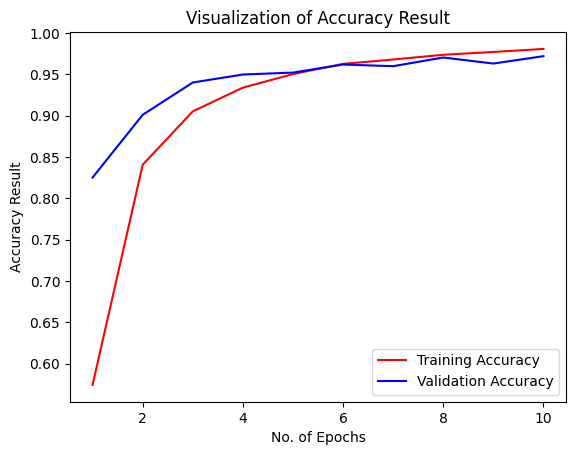

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [32]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

Testing...........................................................................

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step


(array([[1.0212681e-08, 1.5101667e-05, 4.1068557e-09, ..., 7.2004279e-14,
         2.1661872e-14, 7.4138551e-12],
        [7.4182367e-07, 1.0562889e-05, 6.6142647e-09, ..., 5.6523568e-09,
         8.8995868e-08, 2.2201456e-09],
        [1.7819547e-08, 6.4336516e-14, 1.4524303e-14, ..., 6.8343522e-17,
         3.2637941e-18, 2.1061240e-13],
        ...,
        [2.0029165e-12, 1.3681544e-12, 4.3168777e-14, ..., 1.0769877e-17,
         1.5020854e-19, 1.9403406e-17],
        [1.2865995e-15, 8.0237620e-18, 1.4714454e-16, ..., 2.9135538e-16,
         1.5245217e-22, 1.6404924e-20],
        [9.3292624e-07, 2.2539650e-06, 3.4075993e-09, ..., 2.0985295e-08,
         4.6088510e-07, 4.0861257e-09]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([20, 27, 20, ...,  9, 15, 19])>

In [38]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [39]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([34, 16, 33, ...,  9, 11, 18])>

Confusion matrix and classification report

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       504
                                 Apple___Black_rot       0.02      0.02      0.02       497
                          Apple___Cedar_apple_rust       0.03      0.03      0.03       440
                                   Apple___healthy       0.01      0.01      0.01       502
                               Blueberry___healthy       0.04      0.04      0.04       454
          Cherry_(including_sour)___Powdery_mildew       0.04      0.04      0.04       421
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.03      0.03      0.03       410
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477
               Corn_(maize)___Northern_Leaf_Blight       0.03      0.03      0.

In [42]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[14, 16,  5, ..., 16, 16, 13],
       [12, 10,  6, ...,  7,  4, 16],
       [12, 11, 13, ..., 15, 13, 11],
       ...,
       [10, 15, 11, ..., 14, 18, 11],
       [11,  8,  7, ..., 11,  7, 20],
       [ 8,  7, 10, ..., 18, 14,  9]])

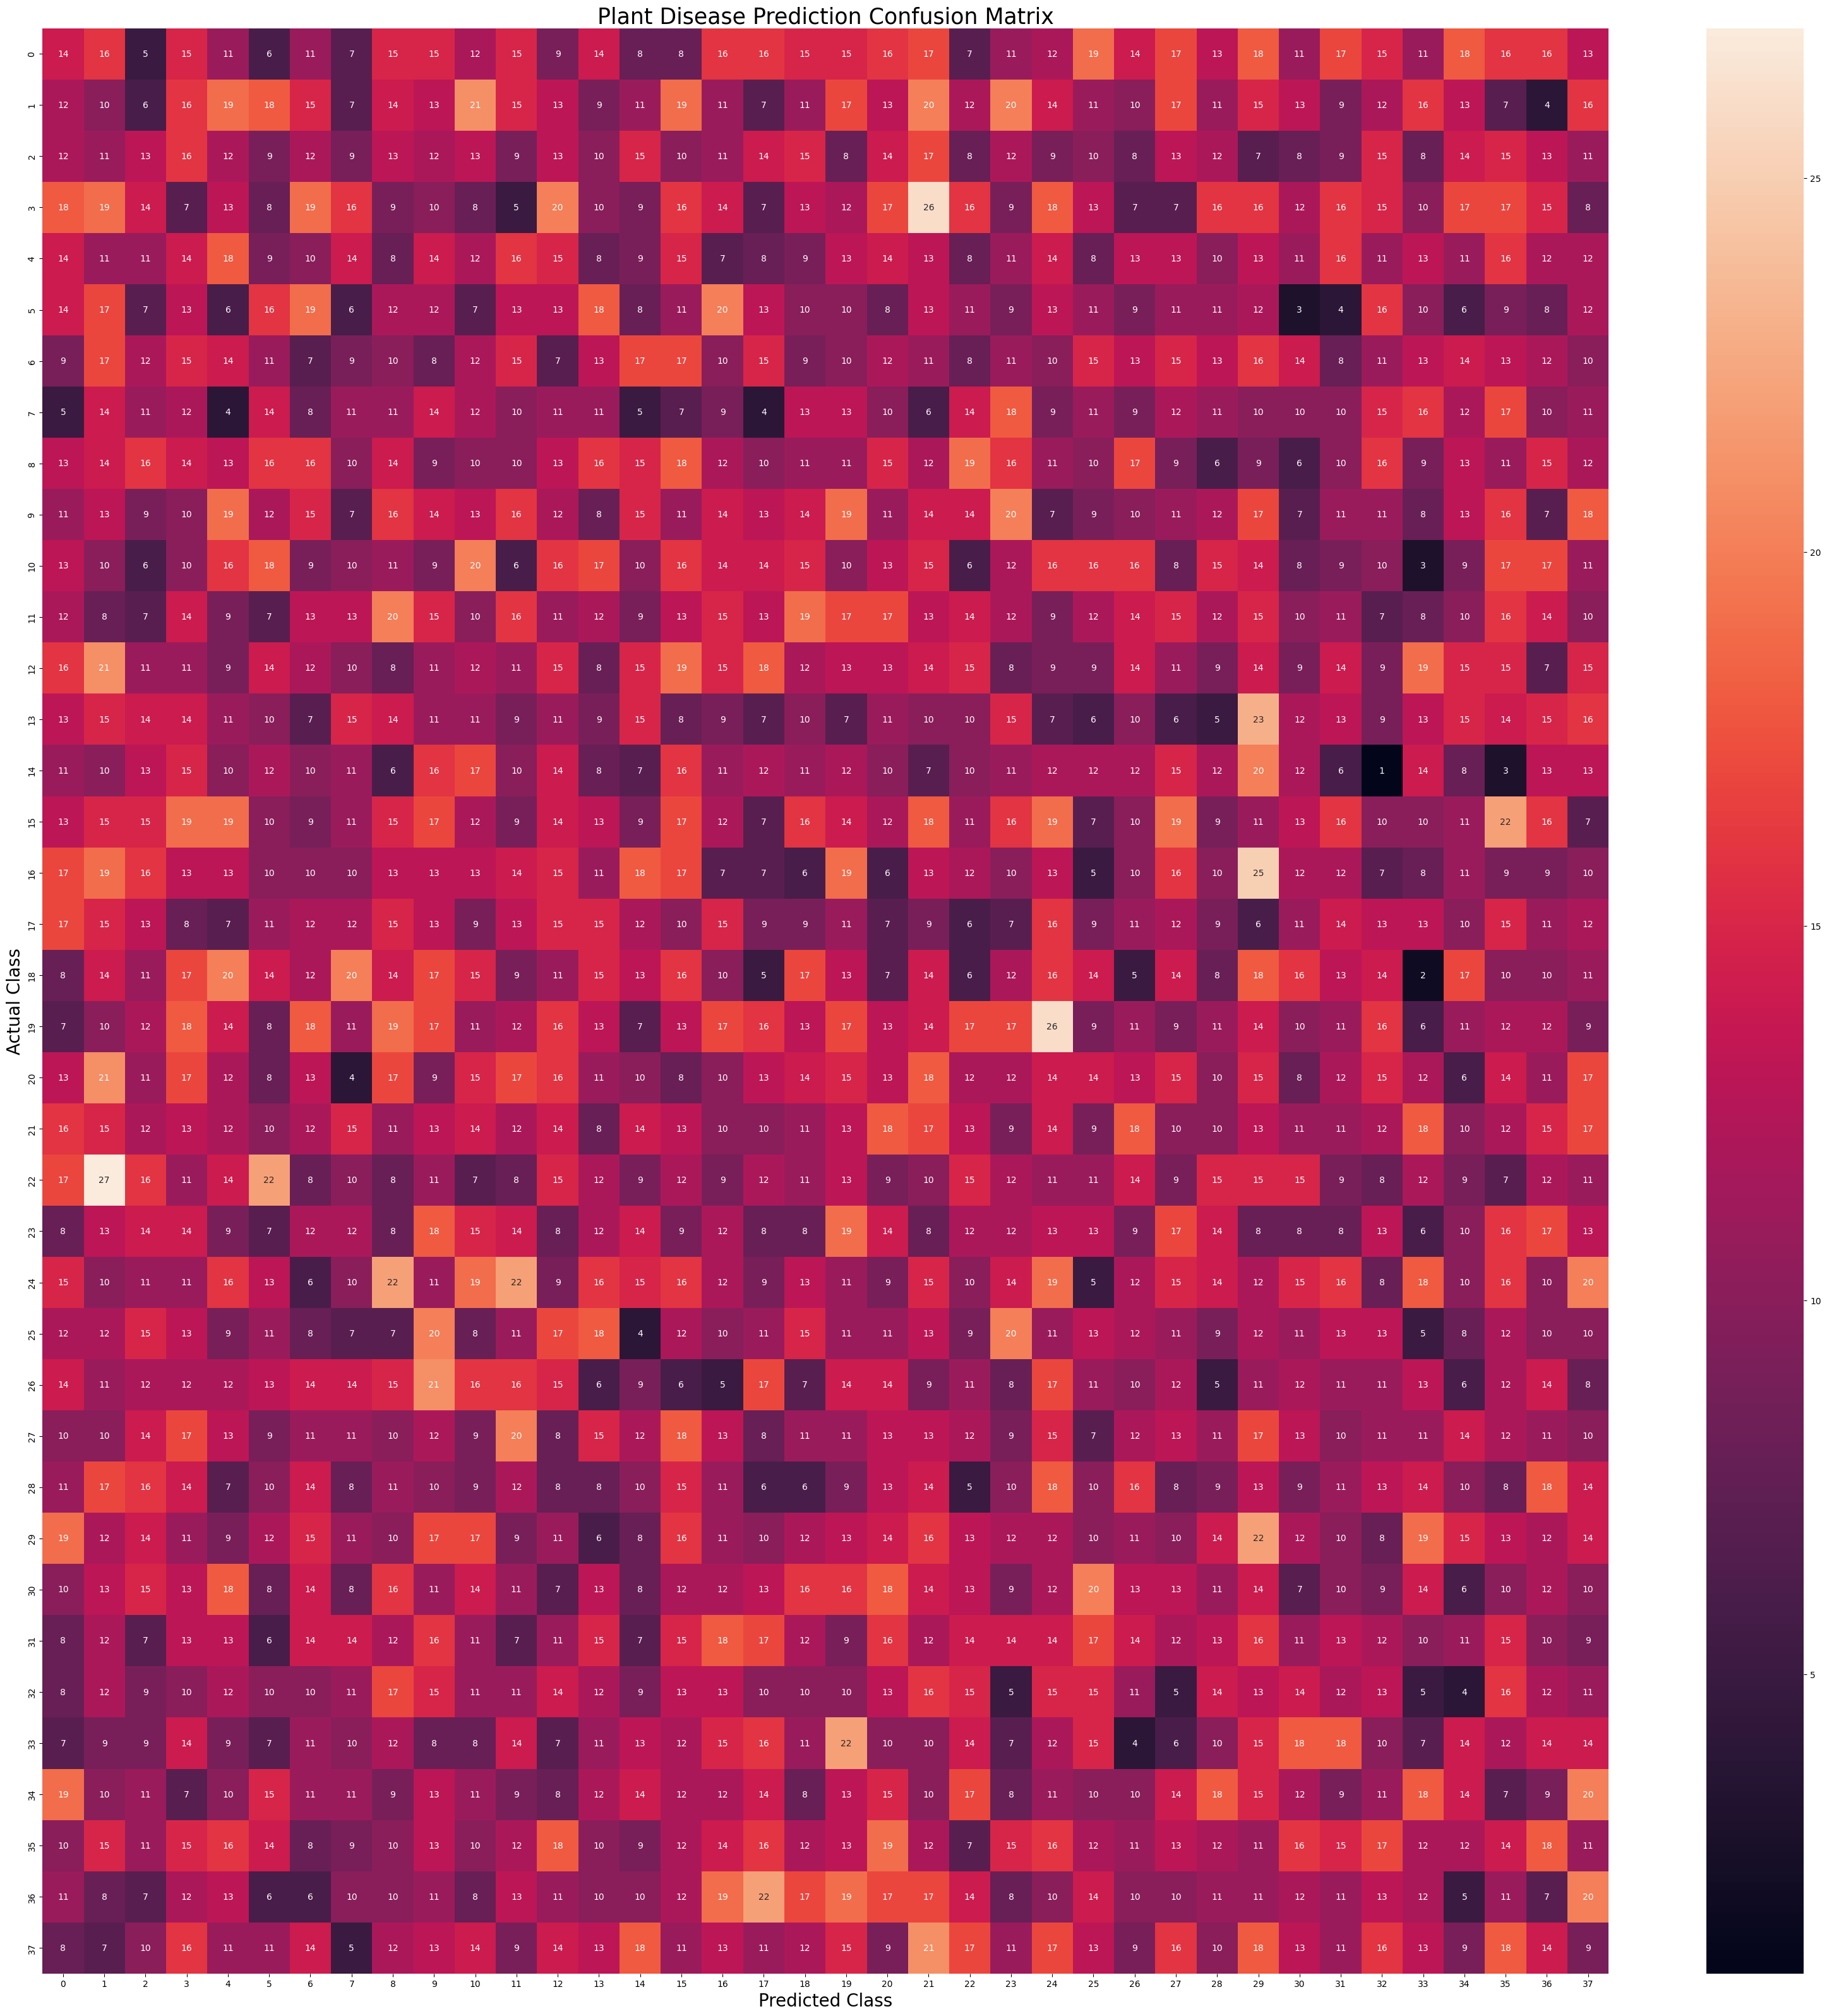

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

Load pretrained model from the directory

In [45]:
model  = tf.keras.models.load_model('/kaggle/working/trained_model.keras')

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        77,862 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,425,748 (55.03 MB)

 Trainable params: 4,808,582 (18.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,617,166 (36.69 MB)

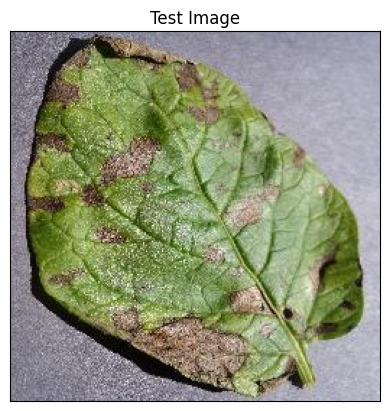

In [ ]:

image_path = "/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight1.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Preprocessing of Test image , for prediction

In [55]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 256, 256, 3)


In [56]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


(array([[6.23655180e-14, 1.39468905e-12, 3.45981280e-15, 5.08308376e-17,
         9.48525775e-18, 1.08944287e-15, 6.16126017e-18, 8.56529361e-11,
         9.11225869e-16, 1.51410839e-12, 1.19315334e-18, 6.91974757e-15,
         6.55496013e-15, 2.22770066e-11, 1.02444696e-18, 1.52166160e-16,
         1.12688480e-15, 5.92458067e-22, 4.57325150e-13, 6.01663252e-17,
         9.99999762e-01, 1.12447395e-07, 7.17401371e-17, 8.77809228e-17,
         3.53026747e-18, 2.76538097e-13, 4.43404673e-08, 1.70926401e-17,
         1.17630705e-15, 1.33016376e-09, 3.57472807e-08, 4.65756090e-19,
         9.81951499e-12, 5.25671294e-18, 2.29777830e-16, 1.88788060e-17,
         1.80419532e-22, 5.63574033e-17]], dtype=float32),
 (1, 38))

Picks up the max probability from array

In [57]:
result_index = np.argmax(prediction)
result_index

20

In [58]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

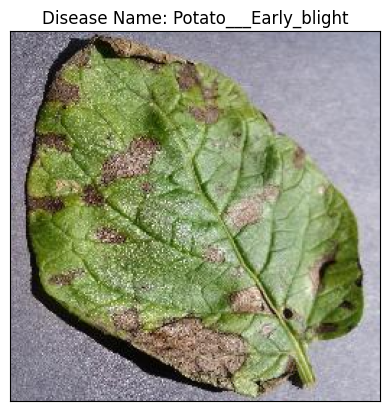

In [59]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

Prediction Result

In [60]:
model_prediction

'Potato___Early_blight'